# Assignment 5 - Concept and Applied questions (ISLP, pp. 193-197)

In [6]:
__author__ = "Will Hinton"
__email__ = "willhint@gmail.com"
__website__ = "whinton0.github.com/py"

# <font color='blue'>Conceptual Question (Chapter 4, number 1. ISLP, p. 193) </font>
## __Q1__ Using a bit of algebra, prove that (4.2) is equivalent to (4.3). In other words, the logistic function representation and logit representation for the logistic regression model are equivalent. (James et al., 2023) 

The mathematical derivation is showing that the logistic function and the logit (log-odds) representation of logistic regression are mathematically equivalent. It begins by expressing the logistic function p(x), which gives the probability of a binary outcome. Then, it simplifies the complement 1 - p(x), and finally computes the odds \begin{aligned} \frac{p(x)}{1 - p(x)}. \end{aligned} By simplifying this ratio, the derivation shows that the odds equal \begin{aligned} \exp(\beta_0 + \beta_1 x). \end{aligned} This confirms that taking the natural logarithm of both sides yields the logit function:
\begin{aligned}
\log\left(\frac{p(x)}{1 - p(x)}\right) = \beta_0 + \beta_1 x
\end{aligned}
Therefore, the derivation confirms that both the probability form and the log-odds form effectively describe the same logistic regression model.

\begin{aligned}
p(x) &= \frac{\exp(\beta_{0} + \beta_{1}x)}{1 + \exp(\beta_0 + \beta_{1}x)}\\1 - p(x) &= 1 - \frac{\exp(\beta_0 + \beta_{1}x)}{1 + \exp(\beta_0 + \beta_{1}x)} \\&= \frac{1 + \exp(\beta_0 + \beta_{1}x) - \exp(\beta_0 + \beta_{1}x)}{1 + \exp(\beta_0 + \beta_{1}x)} \\&= \frac{1}{1 + \exp(\beta_0 + \beta_{1}x)}  \\\Rightarrow \frac{p(x)}{1-p(x)}&= \frac{\exp(\beta_0 + \beta_{1}x)}{1 + \exp(\beta_0 + \beta_{1}x)} \times \frac{1 + \exp(\beta_0 + \beta_{1}x)}{1} \\&= \exp(\beta_0 + \beta_{1}x)
\end{aligned}

# <font color='blue'>Applied Question (Chapter 4, number 13. ISLP, p. 197) </font>

## __Q13__. This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010. 

- This part of the notebook walks through each part of Question 13 using the Weekly dataset.

In [11]:
# === Imports and Setup ===
# We begin by importing all necessary libraries for data manipulation, modeling, and visualization.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import statsmodels.formula.api as smf
from IPython.display import display, HTML


### (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns? 
- The Weekly dataset is loaded. We create a binary outcome for 'Direction' (1 if 'Up', 0 otherwise).
- Visualizations such as pairplots and a heatmap of correlations help in identifying any noticeable patterns.

<Axes: >

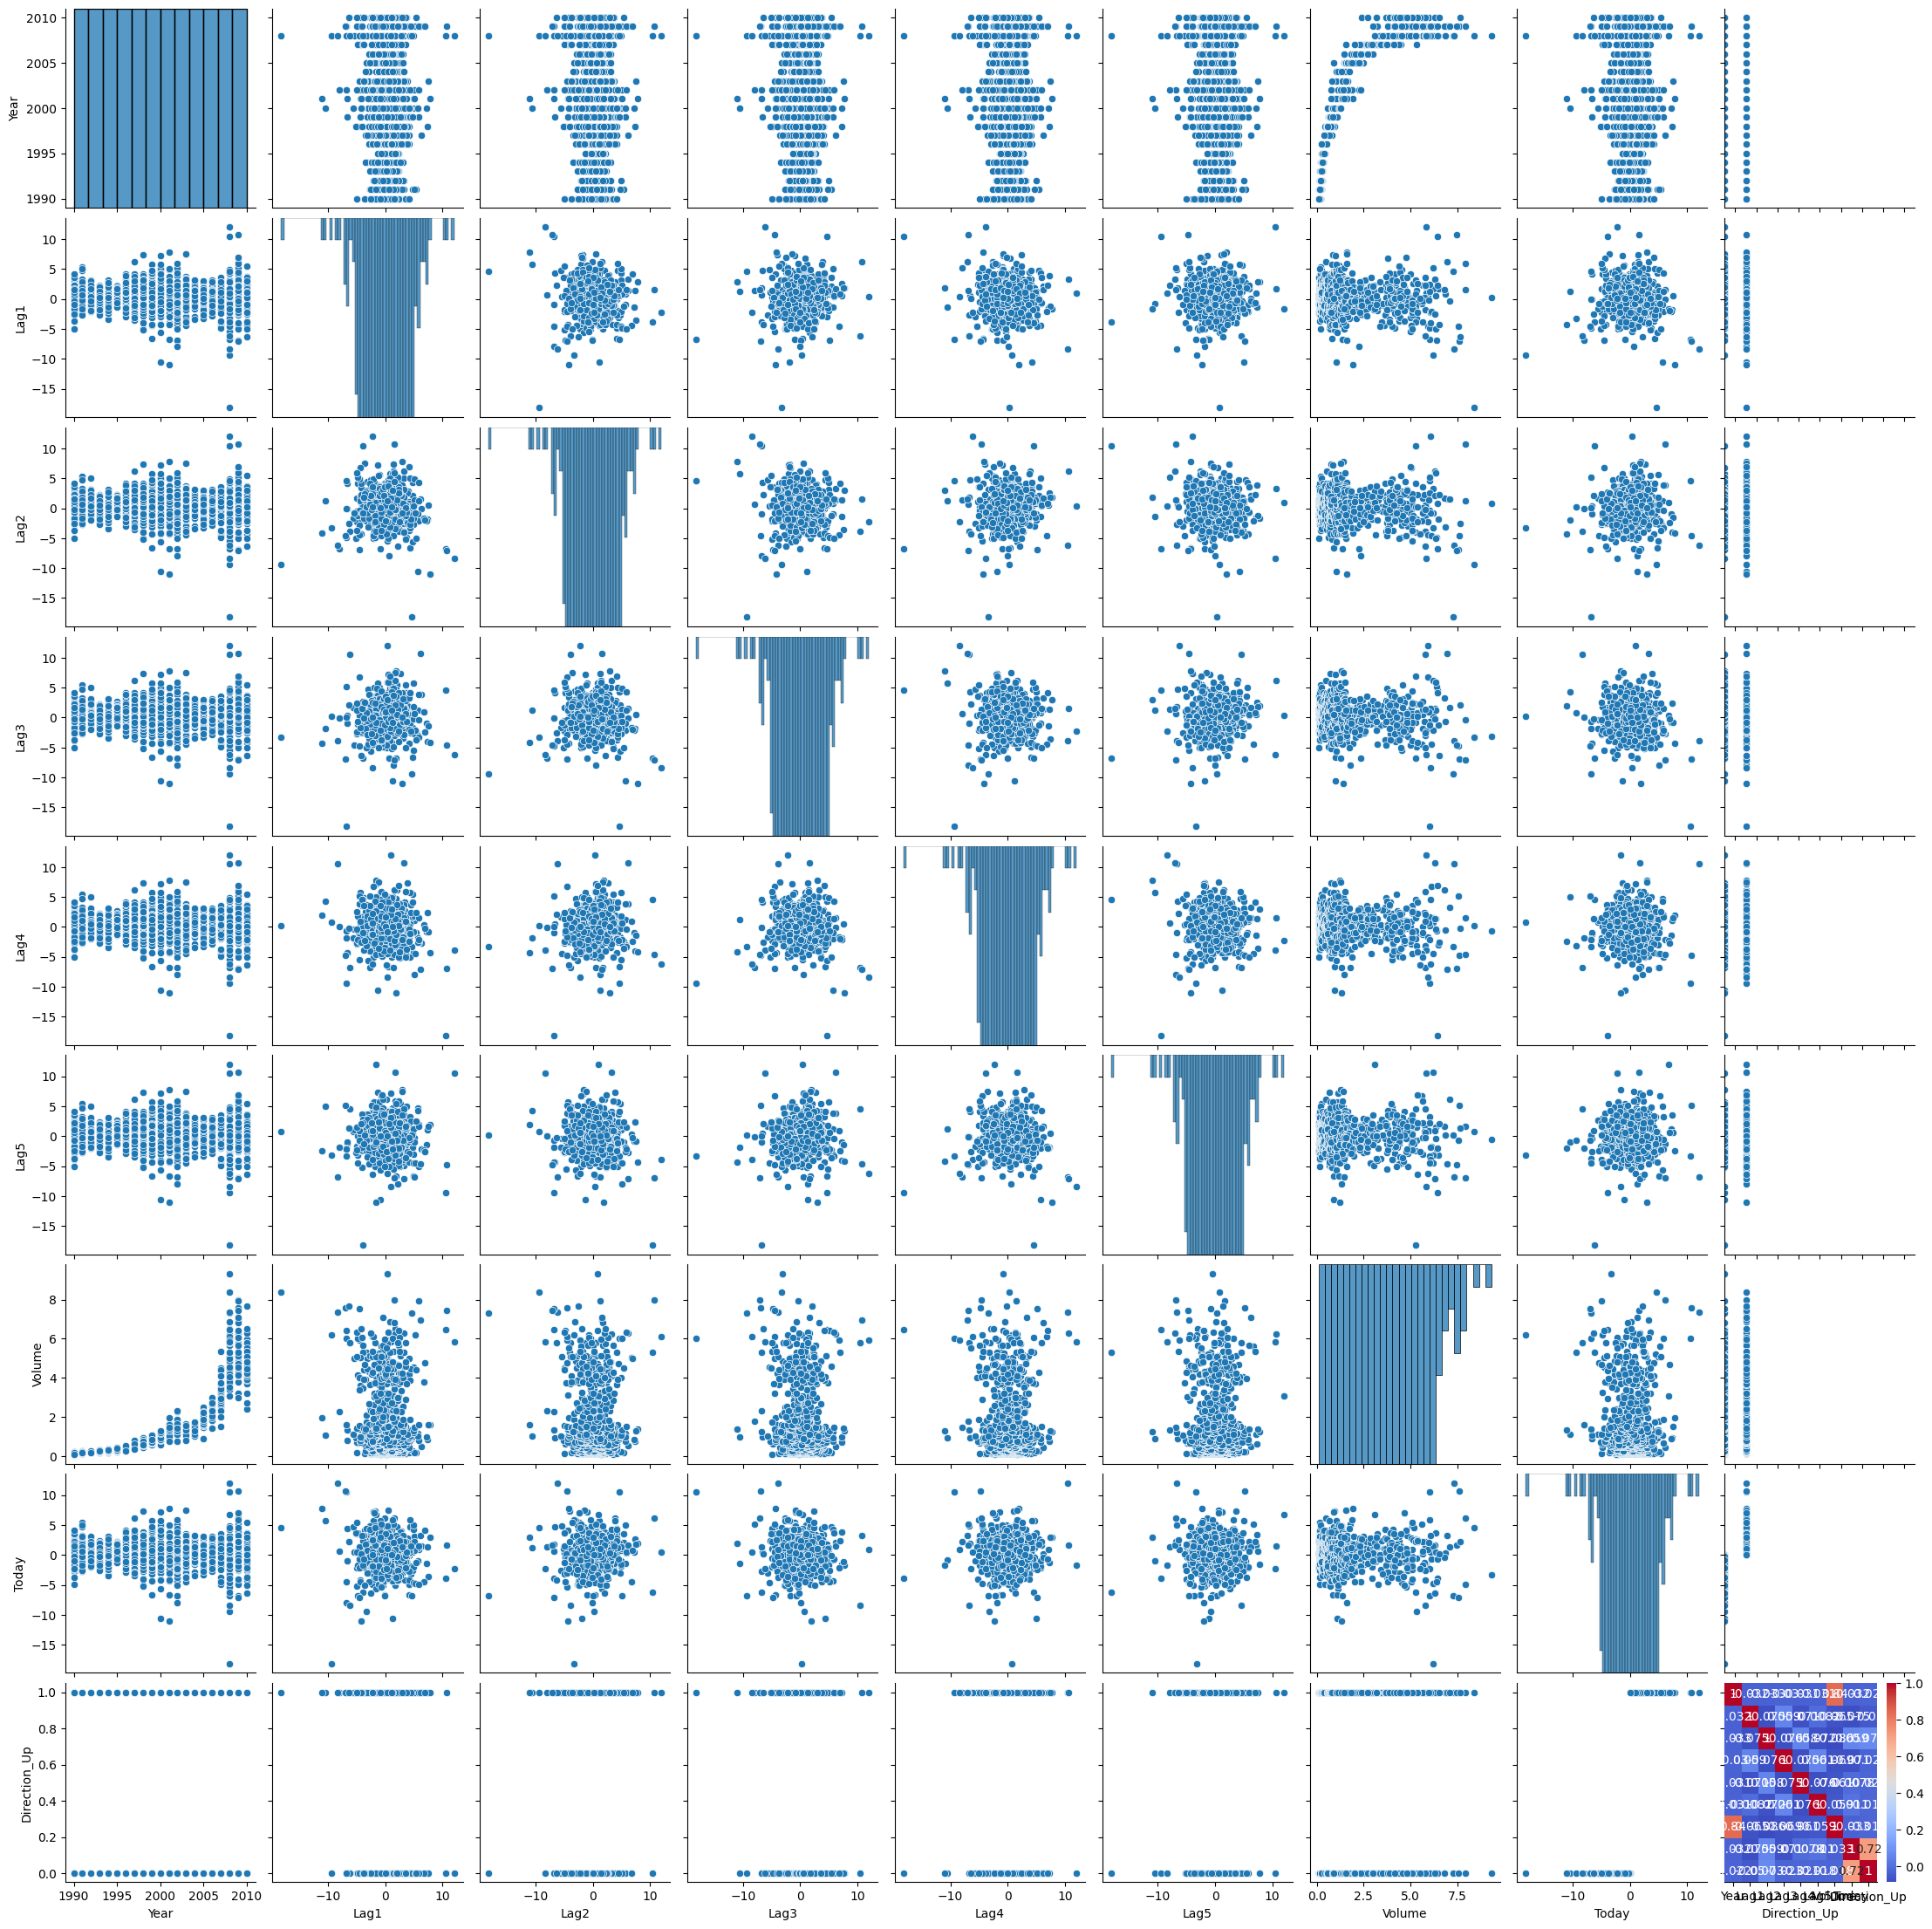

In [22]:
# === (a) Load and Explore Data ===

weekly_df = pd.read_csv('Weekly.csv')
weekly_df['Direction_Up'] = (weekly_df['Direction'] == 'Up').astype(int)
weekly_df.drop(columns='Direction', inplace=True)

# Visual exploration
sns.pairplot(weekly_df)
sns.heatmap(weekly_df.corr(), annot=True, cmap='coolwarm')


### (b) Fit logistic regression on full dataset with all lag features + Volume
- We fit a logistic regression using all lag variables and Volume as predictors.
- We assess which predictors are statistically significant.


In [21]:
# === (b) Logistic Regression on Full Data ===

model_full = smf.logit('Direction_Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=weekly_df).fit()
display(model_full.summary())

sig_vars = model_full.pvalues[model_full.pvalues < 0.05].drop('Intercept')
display(HTML('<h3>Statistically Significant Predictors:</h3>'))
display(sig_vars)


Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 13 Apr 2025   Pseudo R-squ.:                0.006580
Time:                        17:14:07   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

Lag2    0.029601
dtype: float64

### (c) Confusion matrix on full data, evaluating logistic regression fit 
- Evaluate logistic regression model performance using a confusion matrix and compute metrics:
- Total error rate, precision, sensitivity, and specificity.

In [23]:
# === (c) Confusion Matrix and Metrics ===

def classifier_stats(cm):
    tp, fn, fp, tn = cm[1,1], cm[1,0], cm[0,1], cm[0,0]
    total = cm.sum()
    return pd.Series({
        'total_error_rate': 1 - (tp + tn) / total,
        'true_positive_rate': tp / (tp + fn),
        'true_negative_rate': tn / (tn + fp),
        'precision': tp / (tp + fp),
        'false_positive_rate': fp / (fp + tn)
    })

cm_train = model_full.pred_table(threshold=0.5)
display(pd.DataFrame(cm_train))
display(classifier_stats(cm_train))


,0,1
0,54.0,430.0
1,48.0,557.0


total_error_rate       0.438935
true_positive_rate     0.920661
true_negative_rate     0.111570
precision              0.564336
false_positive_rate    0.888430
dtype: float64

### (d-h) Train/Test Split and Classifier Comparison Using Lag2 
- Models are trained on 1990–2008 data and tested on 2009–2010.
- We fit and compare logistic regression, LDA, QDA, KNN, and Naïve Bayes models.

In [24]:
# === (d-h) Train/Test Split and Classifier Comparison Using Lag2 ===

# Data split
train = weekly_df[weekly_df['Year'] < 2009]
test = weekly_df[weekly_df['Year'] >= 2009]
X_train, X_test = train['Lag2'].values.reshape(-1, 1), test['Lag2'].values.reshape(-1, 1)
y_train, y_test = train['Direction_Up'].values, test['Direction_Up'].values

# Train models
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=1).fit(preprocessing.scale(X_train), y_train)
nb = GaussianNB().fit(X_train, y_train)
logit_model = smf.logit('Direction_Up ~ Lag2', data=train).fit()


Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


### (i) Summary comparison 
- Evaluate All Models and Compile Statistics
-  Confusion matrices are computed and used to generate performance statistics for comparison.

In [27]:
# === Evaluate All Models and Compile Statistics ===

models = {'logit': logit_model, 'lda': lda, 'qda': qda, 'knn': knn, 'nbay': nb}
scaled = ['knn']
stats_dict = {}

for name, model in models.items():
    if name == 'logit':
        y_pred = (model.predict(test) > 0.5).astype(int)
    else:
        X_eval = preprocessing.scale(X_test) if name in scaled else X_test
        y_pred = model.predict(X_eval)
    cm = confusion_matrix(y_test, y_pred)
    stats_dict[name] = classifier_stats(cm)

stats_df = pd.DataFrame(stats_dict).T
stats_df


,total_error_rate,true_positive_rate,true_negative_rate,precision,false_positive_rate
logit,0.375000,0.918033,0.209302,0.622222,0.790698
lda,0.375000,0.918033,0.209302,0.622222,0.790698
qda,0.413462,1.000000,0.000000,0.586538,1.000000
knn,0.500000,0.557377,0.418605,0.576271,0.581395
nbay,0.413462,1.000000,0.000000,0.586538,1.000000


### (j) Use all predictors and test with various models 
- Visual Comparison of Metrics 
- We visualize error rates and precision across classifiers to aid interpretation.

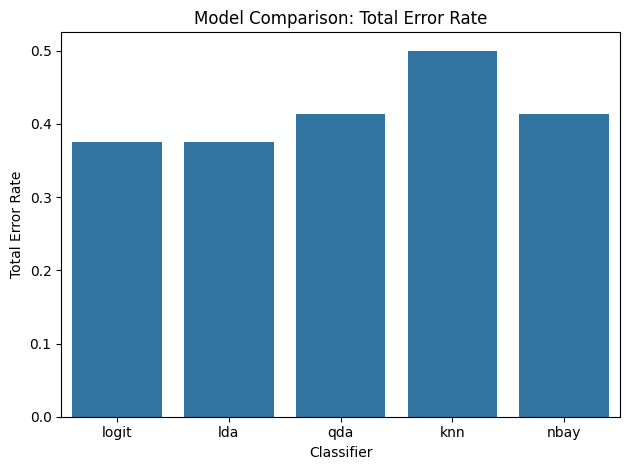

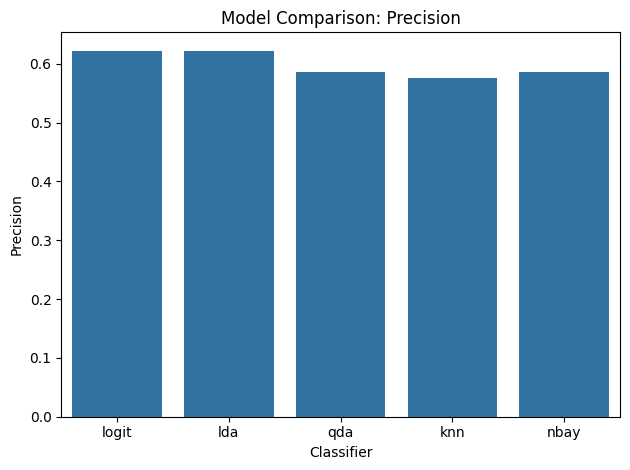

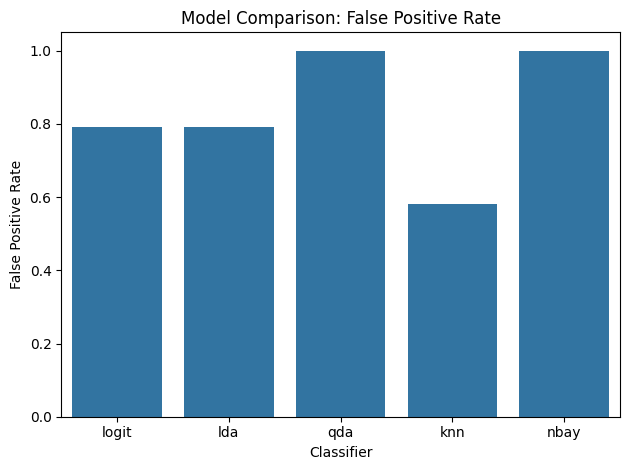

In [28]:
# === Visual Comparison of Metrics ===

for metric in ['total_error_rate', 'precision', 'false_positive_rate']:
    sns.barplot(x=stats_df.index, y=stats_df[metric])
    plt.title(f'Model Comparison: {metric.replace("_", " ").title()}')
    plt.ylabel(metric.replace("_", " ").title())
    plt.xlabel("Classifier")
    plt.tight_layout()
    plt.show()
